In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msmo
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
data=pd.read_csv("C:\\Users\\HP\\Downloads\\fetal_health_proj.csv")

In [4]:
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000,0.000,0.007,0.000,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.000,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.000,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.000,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2


In [5]:
#Shape of data :
data.shape

(2126, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

<AxesSubplot: >

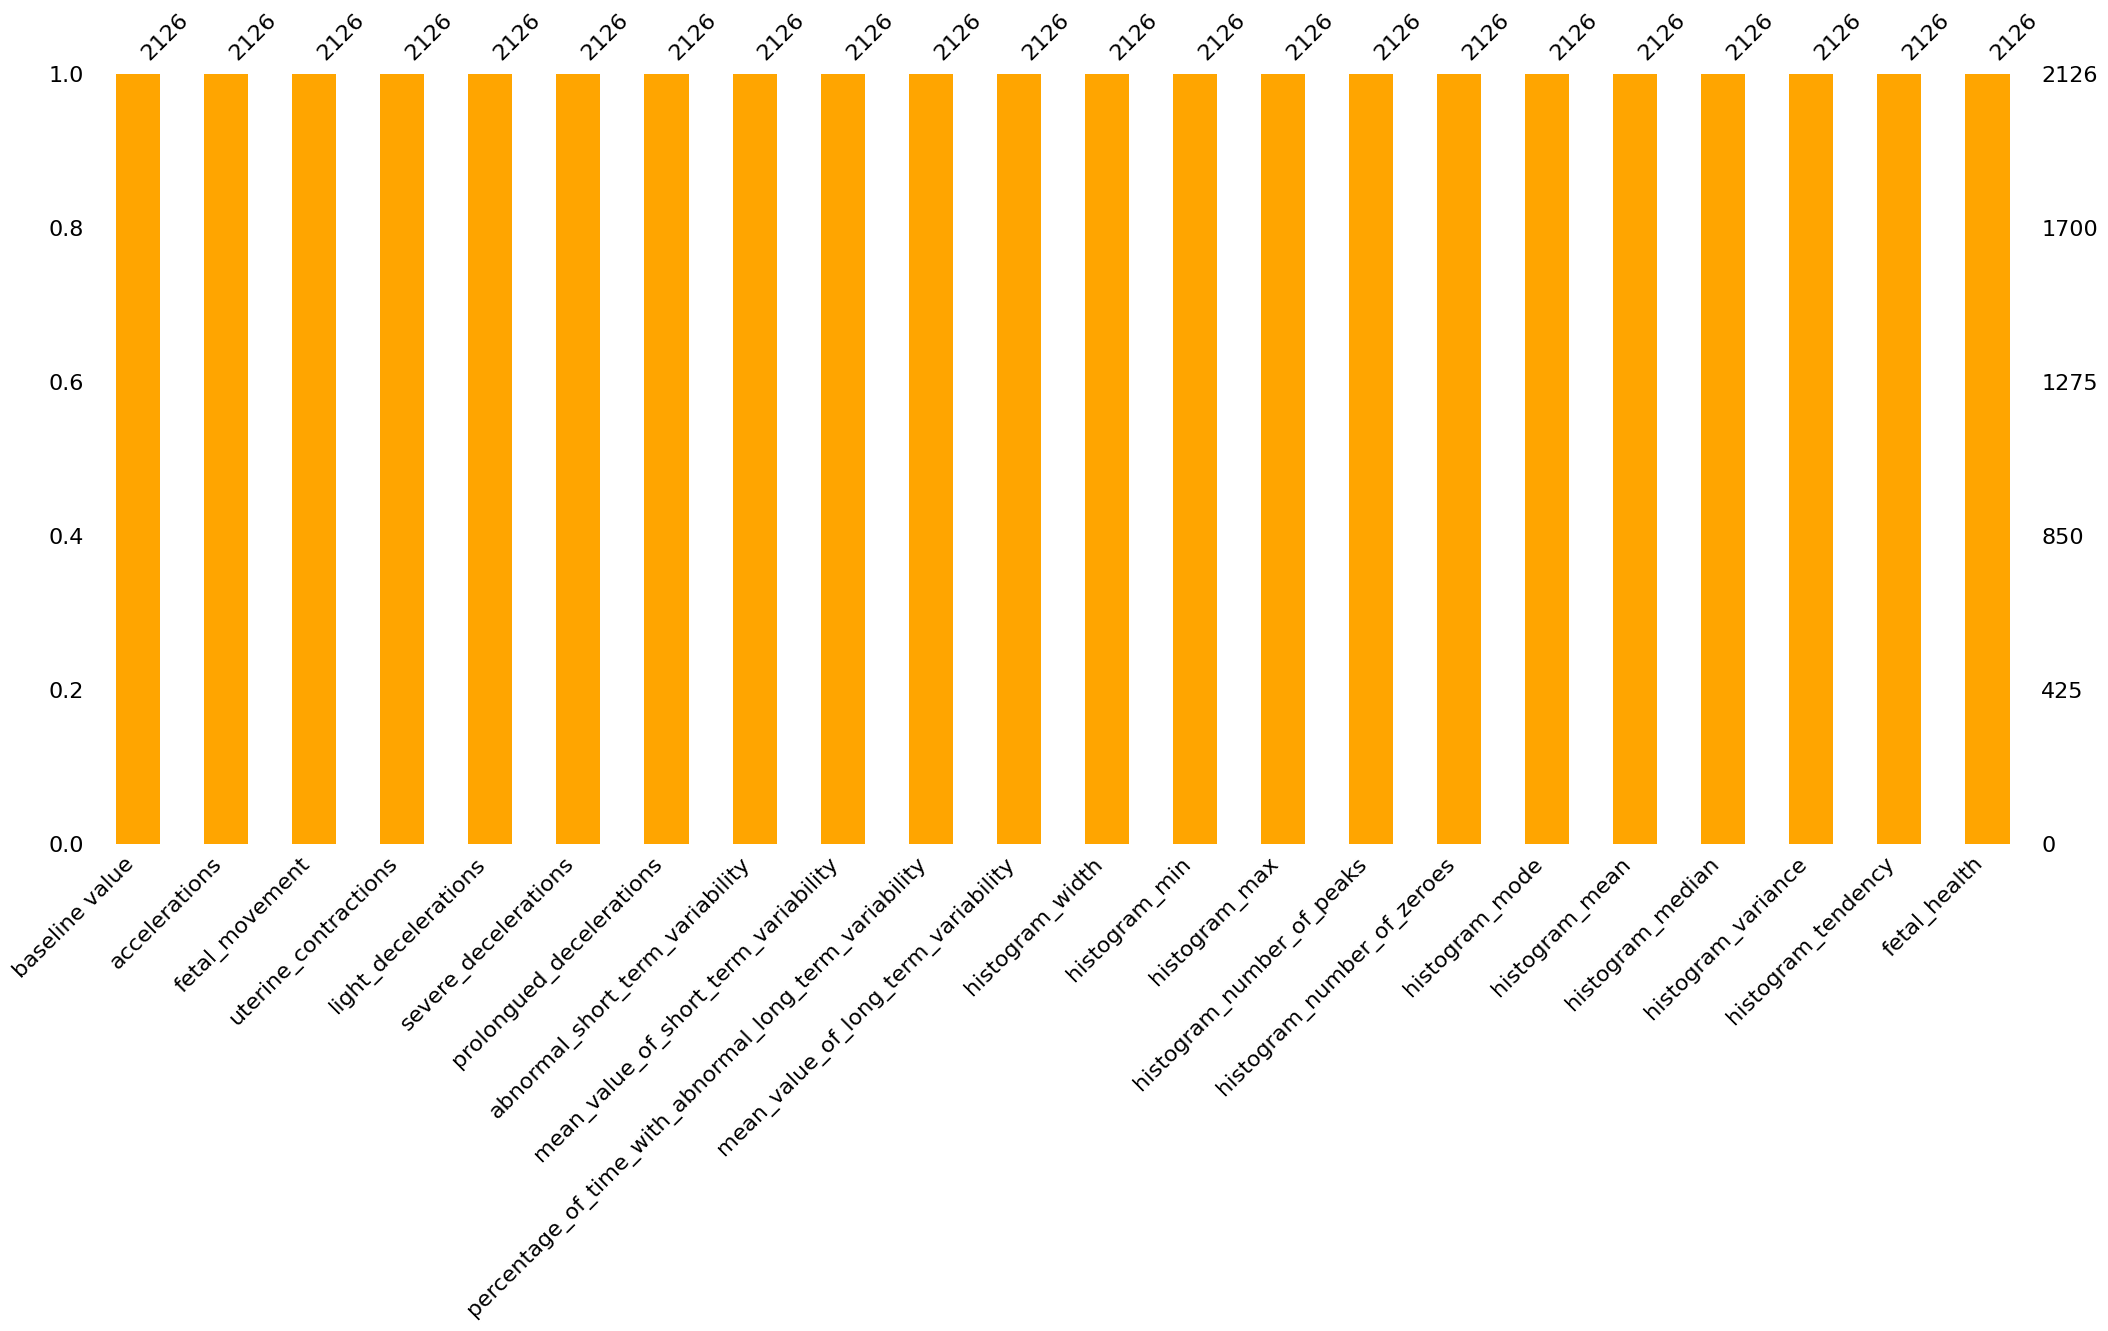

In [7]:
msmo.bar(data,color='orange')
#There seems to be no null values in the dataset
#Conclusion : no null values

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


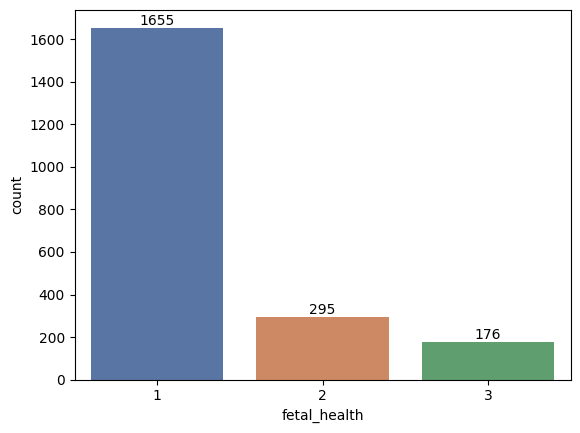

In [9]:
#Output column distribution
ax = sns.countplot(data=data, x = 'fetal_health',palette='deep')
ax.bar_label(ax.containers[0])
plt.show()

<AxesSubplot: >

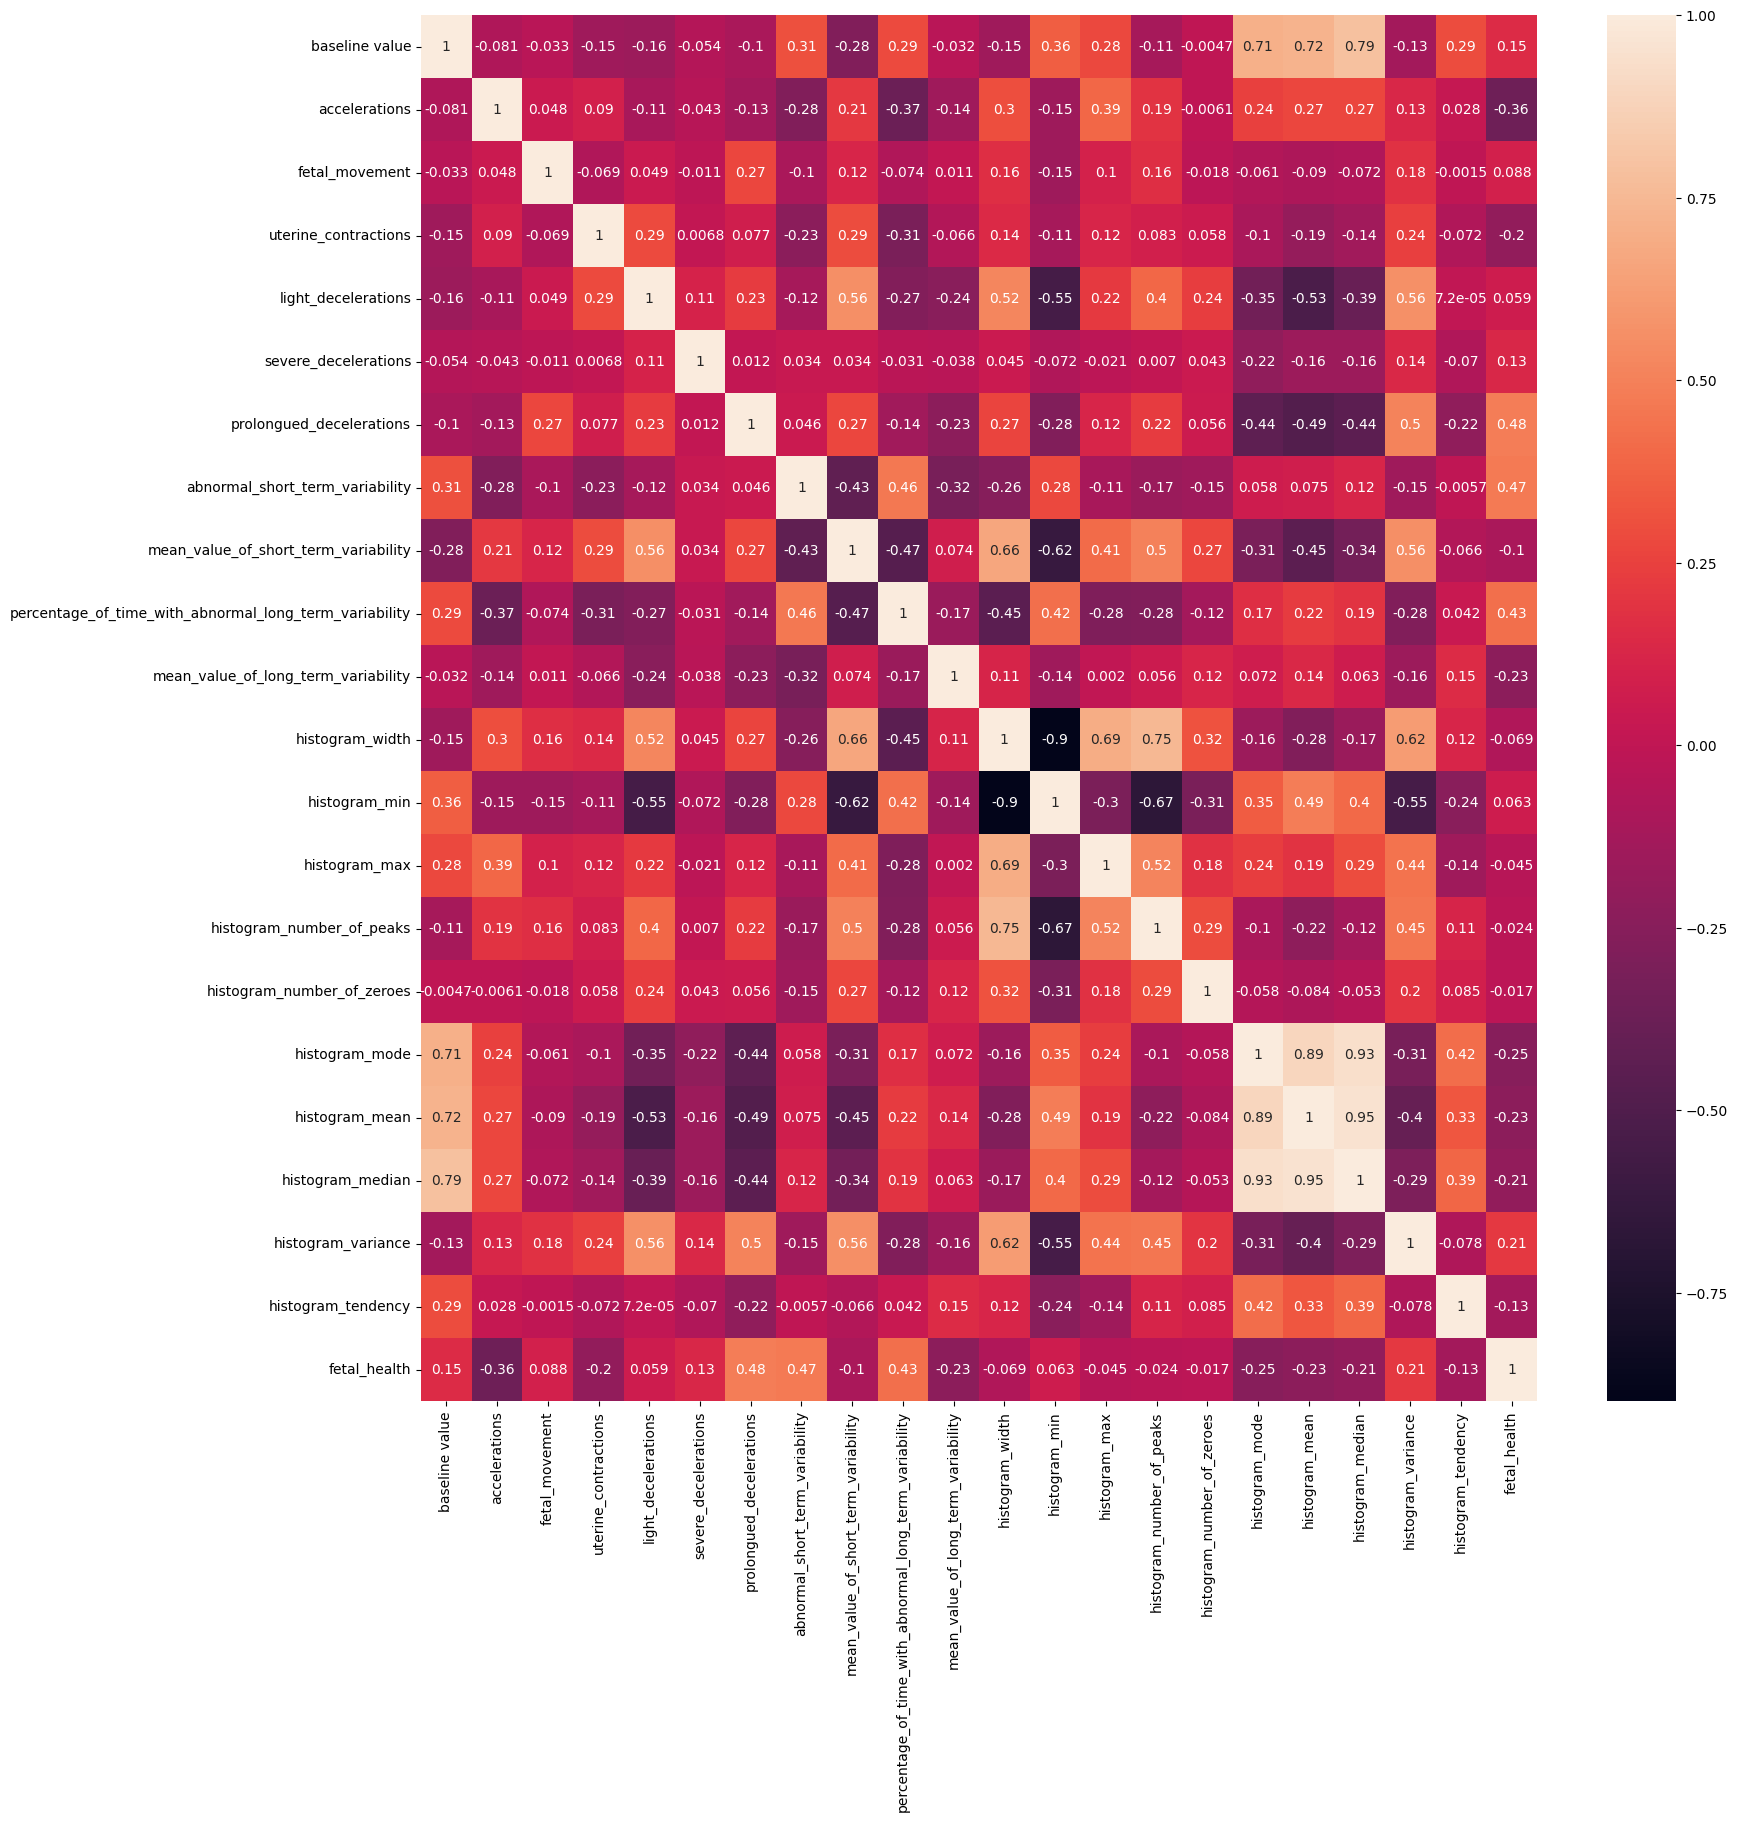

In [10]:
plt.subplots(figsize = (18, 18))
sns.heatmap(data.corr(), annot = True)

In [11]:
def highly_corr(data):
    
    
    df2 = data.corr()
    
    df1 = pd.DataFrame(df2.unstack(),columns=['corr_value'])
    
    filtered_df = pd.DataFrame(df1[((df1['corr_value'] >= .5) | (df1['corr_value'] <= -.5)) & (df1['corr_value'] !=1.000)])
    
    
    filtered_df.reset_index(inplace=True)
    
    filtered_df.sort_values(by='corr_value',ascending=False,inplace=True)
    filtered_df.drop_duplicates(inplace=True,subset='corr_value',keep='first')
    
    print("Correlation values of highly correlated columns")

    return filtered_df 

In [12]:
highly_corr(data)
#histogram_median, histogram_mean, histogram_mode are highly correlated with each other (positive correlation).
#histogram_min , histogram_width are highly correlated with each other (negative correlation).

Correlation values of highly correlated columns


,level_0,level_1,corr_value
37,histogram_mean,histogram_median,0.948251
33,histogram_mode,histogram_median,0.933399
36,histogram_mean,histogram_mode,0.893412
2,baseline value,histogram_median,0.789246
18,histogram_width,histogram_number_of_peaks,0.747071
34,histogram_mean,baseline value,0.723121
31,histogram_mode,baseline value,0.708993
25,histogram_max,histogram_width,0.690769
10,mean_value_of_short_term_variability,histogram_width,0.660847
19,histogram_width,histogram_variance,0.615884


In [13]:
# correlation with output column
data.corr()['fetal_health'].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

In [14]:
hist_column = []
kde_column = []

In [15]:
for i in data.columns:
    if len(data[i].value_counts()) < 10:
        hist_column.append(i)
        print("--------")
        print(i,"-> number of distinct value :",len(data[i].value_counts()))
        print(data[i].value_counts(ascending=False,normalize=True)*100)
        print()
    else:
        kde_column.append(i)
        print(i,"-> number of distinct value :",len(data[i].value_counts()))
        print()

baseline value -> number of distinct value : 48

accelerations -> number of distinct value : 20

fetal_movement -> number of distinct value : 102

uterine_contractions -> number of distinct value : 16

light_decelerations -> number of distinct value : 16

--------
severe_decelerations -> number of distinct value : 2
0.000    99.670743
0.001     0.329257
Name: severe_decelerations, dtype: float64

--------
prolongued_decelerations -> number of distinct value : 6
0.000    91.627469
0.002     3.386642
0.001     3.292568
0.003     1.128881
0.004     0.423330
0.005     0.141110
Name: prolongued_decelerations, dtype: float64

abnormal_short_term_variability -> number of distinct value : 75

mean_value_of_short_term_variability -> number of distinct value : 57

percentage_of_time_with_abnormal_long_term_variability -> number of distinct value : 87

mean_value_of_long_term_variability -> number of distinct value : 249

histogram_width -> number of distinct value : 154

histogram_min -> number 

In [16]:
data[['severe_decelerations','fetal_health']].value_counts(normalize=True)

severe_decelerations  fetal_health
0.000                 1               0.777987
                      2               0.138758
                      3               0.079962
0.001                 3               0.002822
                      1               0.000470
dtype: float64

In [17]:
data[['prolongued_decelerations','fetal_health']].value_counts(normalize=True)
#These two columns can be dropped as they have more than 99% values which are same

#prolongued_decelerations

#severe_decelerations

prolongued_decelerations  fetal_health
0.000                     1               0.746002
                          2               0.131703
                          3               0.038570
0.001                     1               0.025400
0.002                     3               0.023989
0.003                     3               0.009407
0.002                     1               0.006585
0.001                     3               0.005174
0.004                     3               0.004233
0.002                     2               0.003293
0.001                     2               0.002352
0.003                     2               0.001411
0.005                     3               0.001411
0.003                     1               0.000470
dtype: float64

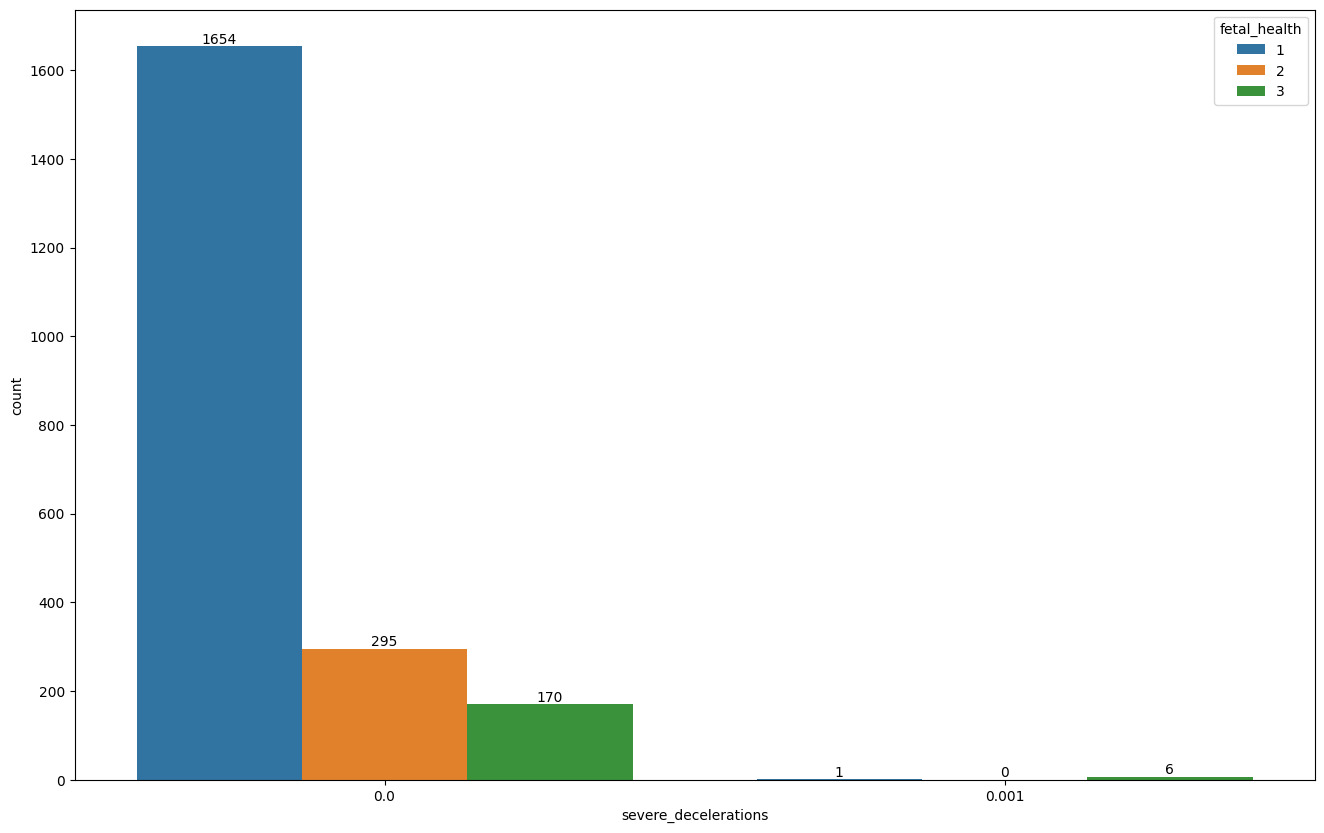

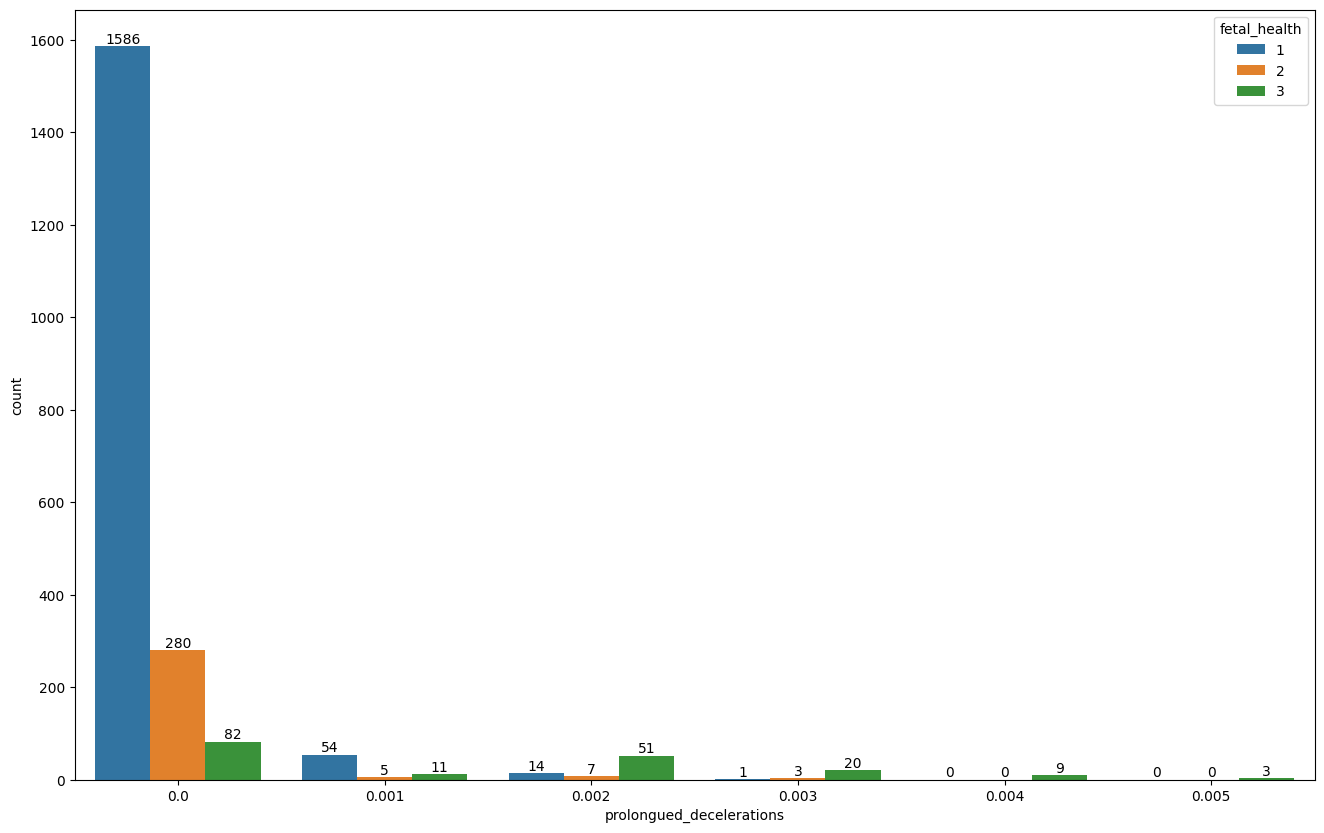

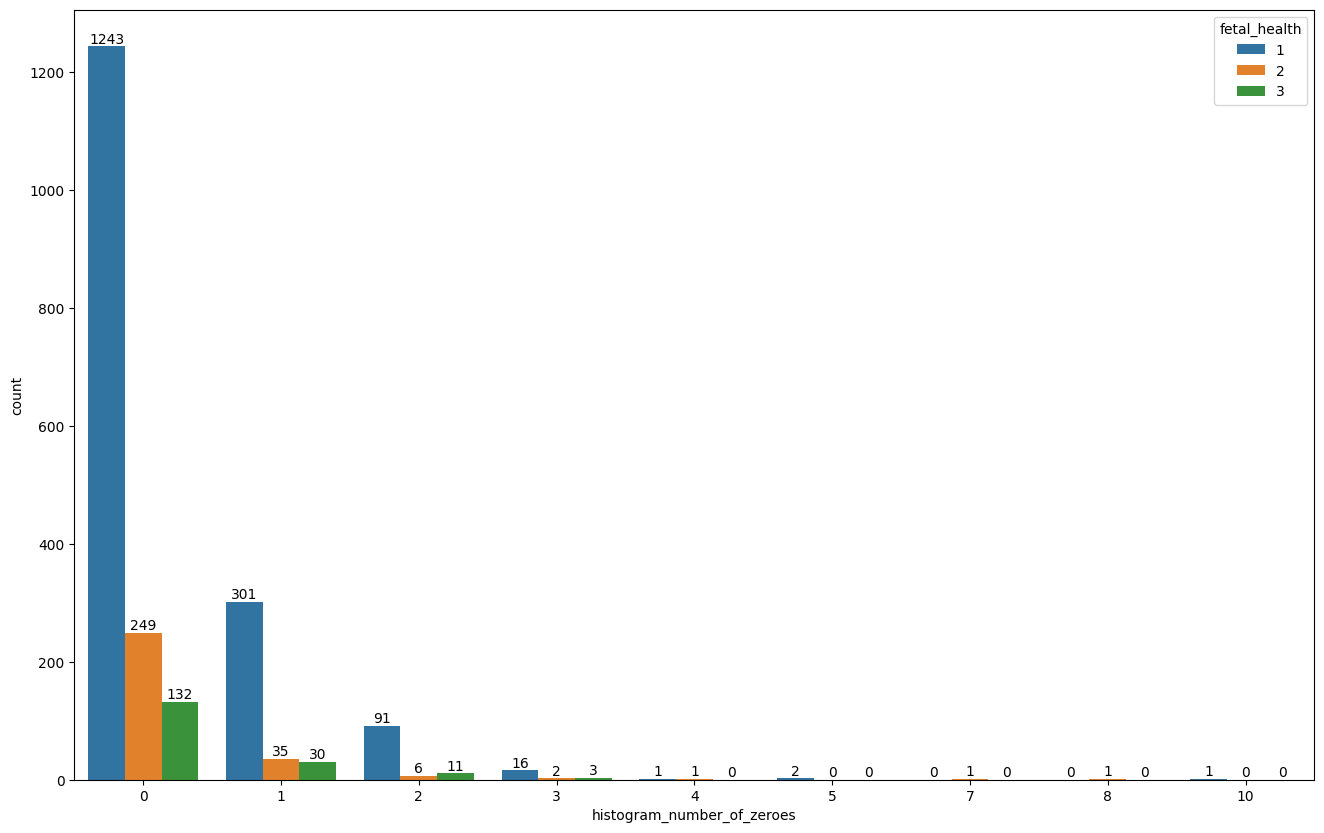

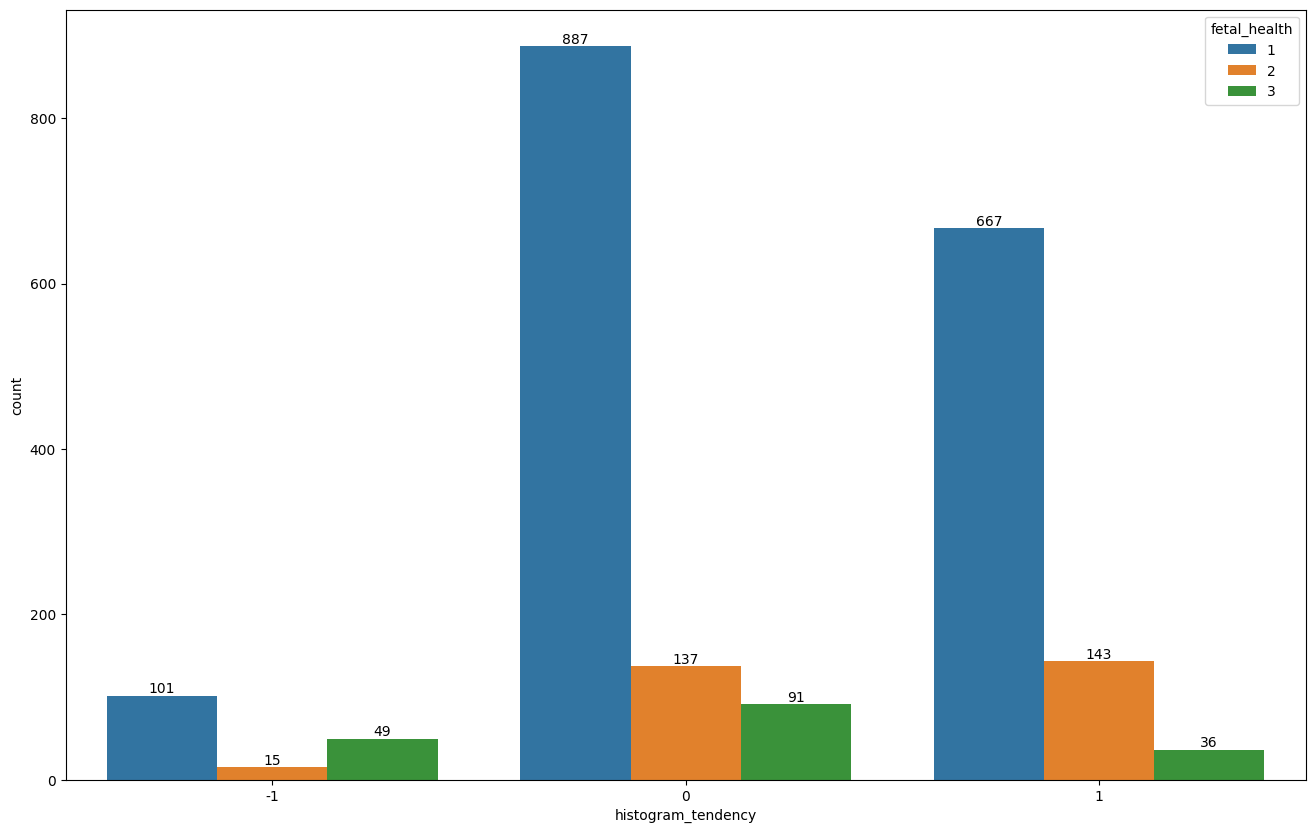

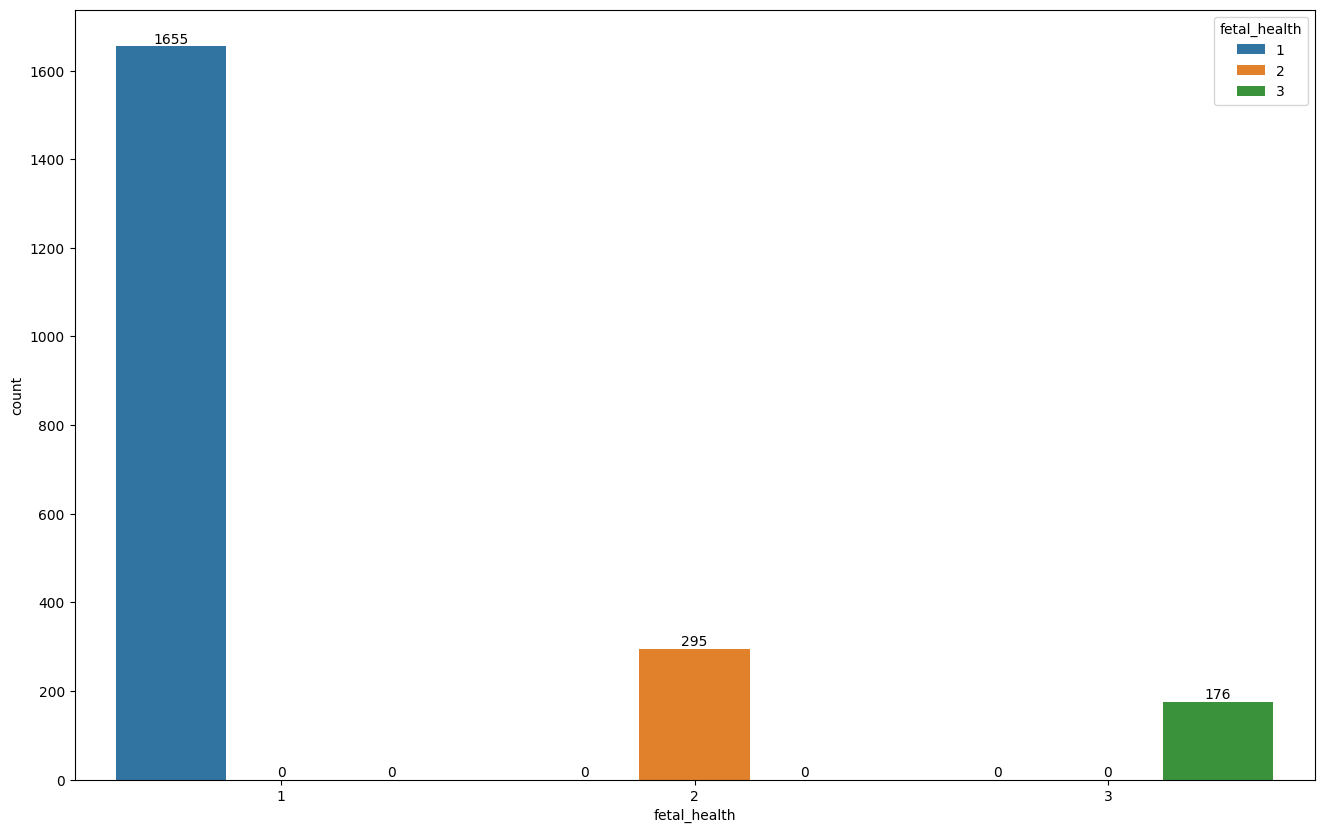

In [18]:
for i in hist_column:
    plt.figure(figsize=(16,10))
    ax = sns.countplot(data=data, x = i,hue='fetal_health')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.bar_label(ax.containers[2])
    plt.show()
    print()


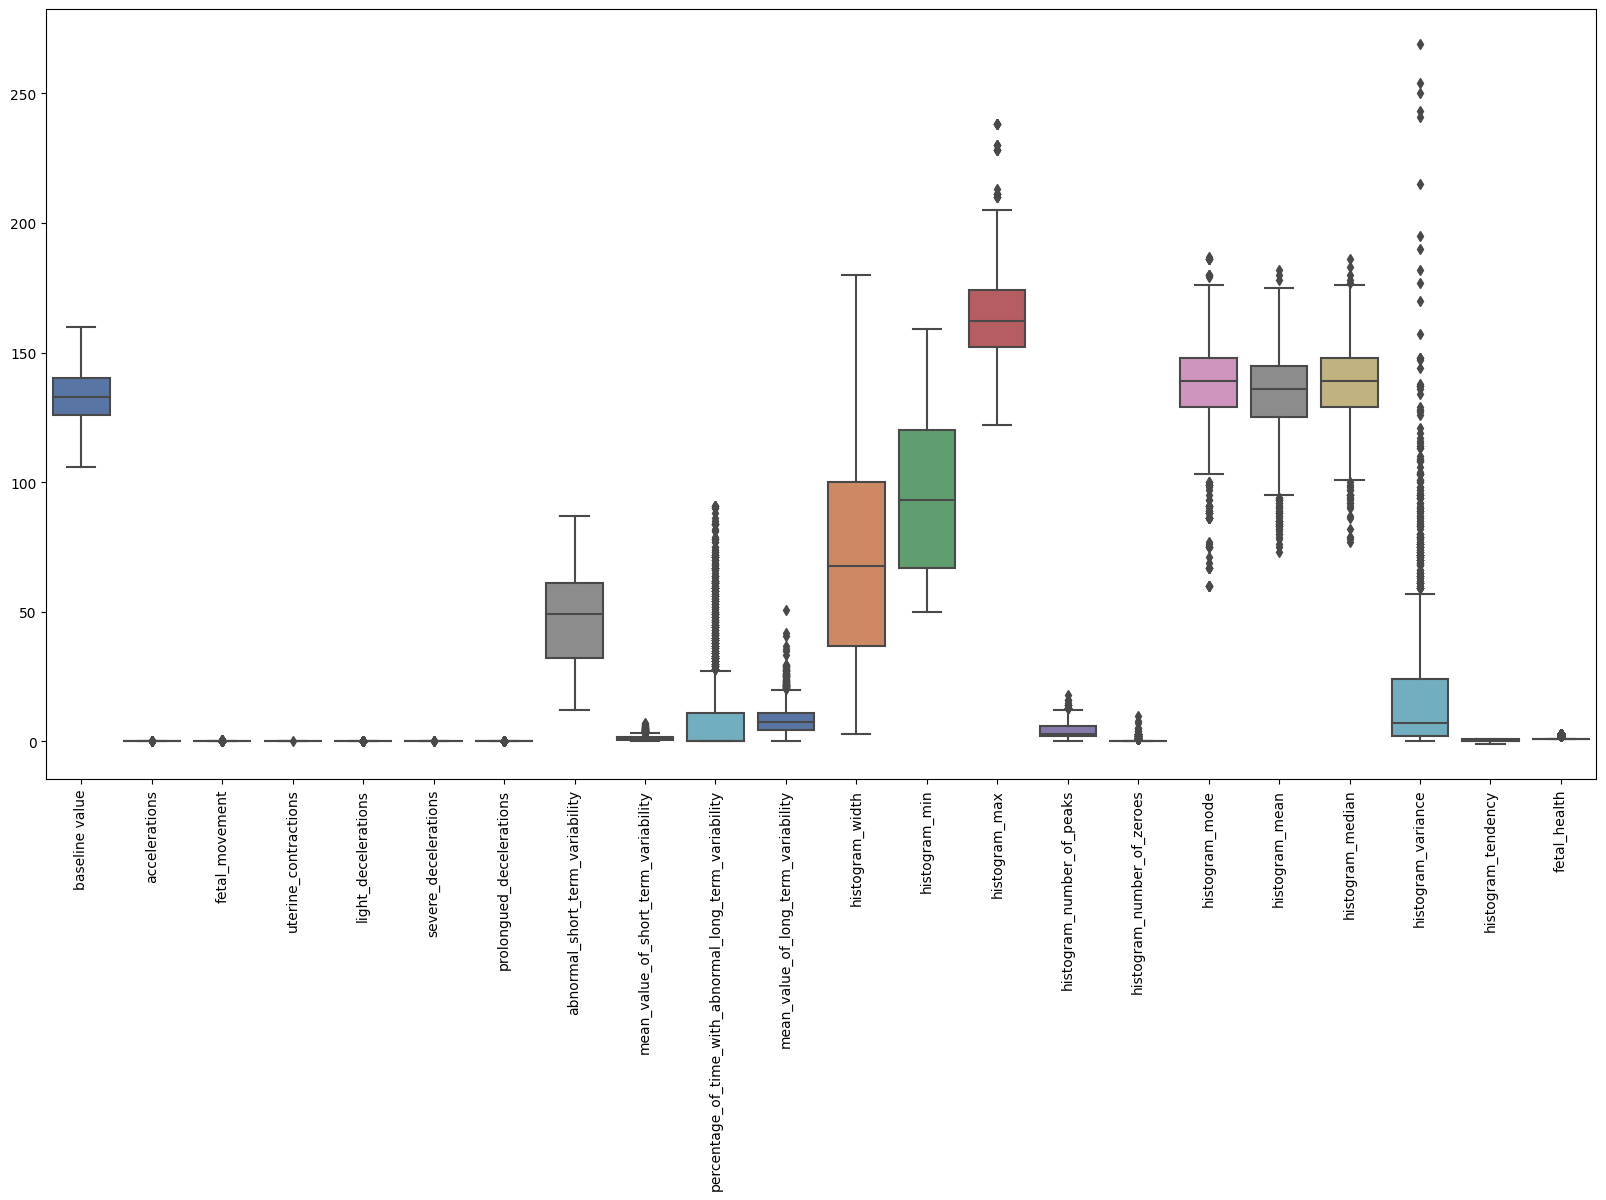

In [19]:
#Outlier detection
plt.figure(figsize=(20,10))
sns.boxplot(data=data,palette='deep')
plt.xticks(rotation=90)
plt.show()

In [20]:
#Splitting into Dependent and Independent columns
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X.shape, y.shape

((2126, 21), (2126,))

In [21]:
#Splitting into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=45)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1700, 21), (426, 21), (1700,), (426,))

In [23]:
y_train.value_counts(normalize=True)

1    0.778235
2    0.138824
3    0.082941
Name: fetal_health, dtype: float64

In [24]:
y_test.value_counts(normalize=True)

1    0.779343
2    0.138498
3    0.082160
Name: fetal_health, dtype: float64

In [25]:
#Model Building
skf = StratifiedKFold(n_splits=10)

In [26]:
model = RandomForestClassifier(n_jobs=-1)

In [27]:
#Creating Pipeline
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model',model)
])

In [28]:
#Pipeline and cross val score
cross_val_score(pipe, X, y, cv = skf, scoring='accuracy').mean()

0.8780959340951368

In [29]:
#Creating random forest with Gridsearch parameters:
model = RandomForestClassifier(
    n_estimators = 200,
    criterion='gini',
    max_depth = 5,
    max_features = 'sqrt',
    min_samples_leaf=15,
    min_samples_split=50,
    oob_score=True,
    n_jobs=-1,
    verbose=1)

In [30]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', model)
])

In [31]:
pipe.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=15,
                                        min_samples_split=50, n_estimators=200,
                                        n_jobs=-1, oob_score=True,
                                        verbose=1))])

In [32]:
y_pred = pipe.predict(X_test)
y_pred

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


array([3, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 3, 3, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,

In [33]:
rf_testscore = accuracy_score(y_test,y_pred)*100
print("testing score of Random forest : ","%.3f"%(rf_testscore),"%")

testing score of Random forest :  92.488 %


In [34]:
rf_trainscore = accuracy_score(y_train,pipe.predict(X_train))*100
print("training score of Random forest : ","%.3f"%(rf_trainscore),"%")

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


training score of Random forest :  91.765 %


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


In [35]:
rf_classification_report = classification_report(y_test,y_pred)
print(rf_classification_report)

              precision    recall  f1-score   support

           1       0.93      0.99      0.96       332
           2       0.84      0.64      0.73        59
           3       1.00      0.77      0.87        35

    accuracy                           0.92       426
   macro avg       0.92      0.80      0.85       426
weighted avg       0.92      0.92      0.92       426



In [36]:
# K Nearest Neighbor
model = KNeighborsClassifier(n_jobs=-1)

In [37]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model',model)
])

In [38]:
cross_val_score(pipe, X, y, cv = skf, scoring='accuracy').mean()

0.8381610417220303

In [39]:
model = KNeighborsClassifier(
    n_jobs = -1,
    algorithm = 'auto', 
    leaf_size = 20, 
    n_neighbors = 17, 
    p = 2, 
    weights = 'uniform'
)

In [40]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', model)
])

In [41]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(leaf_size=20, n_jobs=-1,
                                      n_neighbors=17))])

In [42]:
y_pred = pipe.predict(X_test)
y_pred

array([3, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1,
       1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1,

In [43]:
knn_testscore = accuracy_score(y_test,y_pred)*100
print("testing score of KNN : ","%.3f"%(knn_testscore),"%")

testing score of KNN :  89.437 %


In [44]:
knn_trainscore = accuracy_score(y_train,pipe.predict(X_train))*100
print("training score of KNN : ","%.3f"%(knn_trainscore),"%")

training score of KNN :  90.118 %


In [45]:
knn_classification_report = classification_report(y_test,y_pred)
print(knn_classification_report)

              precision    recall  f1-score   support

           1       0.92      0.97      0.94       332
           2       0.70      0.59      0.64        59
           3       0.96      0.71      0.82        35

    accuracy                           0.89       426
   macro avg       0.86      0.76      0.80       426
weighted avg       0.89      0.89      0.89       426



In [46]:
#Gradient Boosting
#Using MinMax Scaler
model = GradientBoostingClassifier()

In [47]:
pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('model',model)
])

In [48]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', GradientBoostingClassifier())])

In [49]:
y_pred = pipe.predict(X_test)
y_pred

array([3, 2, 1, 1, 3, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 3, 3, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2,

In [50]:
accuracy_score(y_test,y_pred)

0.9553990610328639

In [51]:
cross_val_score(pipe, X, y, cv = skf, scoring='accuracy').mean()

0.8950150589069006

In [52]:
model = GradientBoostingClassifier(criterion = 'squared_error',
                           learning_rate=0.3,
                           max_depth=5,
                           max_features=0.4,
                           min_samples_leaf=15,
                          min_samples_split=60,
                          n_estimators=300,
                          verbose=1)

In [53]:
pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('model',model)
])

In [54]:
pipe.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.3634            5.27s
         2           0.2747            4.87s
         3           0.2228            4.34s
         4           0.1868            4.11s
         5           0.1631            4.20s
         6           0.1456            3.89s
         7           0.1296            3.98s
         8           0.1168            3.88s
         9           0.1056            3.70s
        10           0.0944            3.57s
        20           0.0451            3.64s
        30           0.0277            3.10s
        40           0.0177            3.22s
        50           0.0116            3.10s
        60           0.0081            3.01s
        70           0.0058            2.89s
        80           0.0043            2.75s
        90           0.0034            2.60s
       100           0.0028            2.48s
       200           0.0017            1.25s
       300           0.0016            0.00s


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 GradientBoostingClassifier(criterion='squared_error',
                                            learning_rate=0.3, max_depth=5,
                                            max_features=0.4,
                                            min_samples_leaf=15,
                                            min_samples_split=60,
                                            n_estimators=300, verbose=1))])

In [55]:
y_pred = pipe.predict(X_test)
y_pred

array([3, 2, 1, 1, 3, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 3, 3, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2,

In [56]:
gbc_testscore = accuracy_score(y_test,y_pred)*100
print("testing score of GBC : ","%.3f"%(gbc_testscore),"%")

testing score of GBC :  96.948 %


In [57]:
gbc_trainscore = accuracy_score(y_train,pipe.predict(X_train))*100
print("training score of GBC : ","%.3f"%(gbc_trainscore),"%")

training score of GBC :  99.882 %


In [58]:
gbc_classification_report = classification_report(y_test,y_pred)
print(gbc_classification_report)

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       332
           2       0.96      0.86      0.91        59
           3       0.94      0.94      0.94        35

    accuracy                           0.97       426
   macro avg       0.96      0.93      0.95       426
weighted avg       0.97      0.97      0.97       426

